In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import seaborn as sns 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import plotly.express as px
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv("china.csv")
df

,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,Resource,Duration,DevType,AdjFactor,Effort
0,1587,774,260,340,128,0,1502,0,0,4,4.0,NewDev,1.056591,7490
1,260,9,4,3,193,41,51,138,61,2,17.0,Maint,1.040000,4150
2,152,25,33,28,42,35,163,0,0,1,9.0,NewDev,0.932515,668
3,252,151,28,8,39,0,69,153,4,1,4.0,Maint,1.115044,3238
4,292,93,0,194,20,0,0,307,0,1,13.0,Maint,0.951140,2994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,51,32,0,16,7,0,0,55,0,1,3.0,Maint,0.927273,899
495,1106,410,267,108,152,25,962,0,0,2,20.0,NewDev,1.149688,16560
496,99,13,32,3,42,5,95,0,0,1,4.0,NewDev,1.042105,526
497,56,24,0,9,14,0,47,0,0,2,6.0,NewDev,1.191489,440


In [4]:
df.drop(["Deleted", "Resource", "Changed", "Interface", "AdjFactor", "DevType"], axis=True, inplace=True)
df

,AFP,Input,Output,Enquiry,File,Added,Duration,Effort
0,1587,774,260,340,128,1502,4.0,7490
1,260,9,4,3,193,51,17.0,4150
2,152,25,33,28,42,163,9.0,668
3,252,151,28,8,39,69,4.0,3238
4,292,93,0,194,20,0,13.0,2994
...,...,...,...,...,...,...,...,...
494,51,32,0,16,7,0,3.0,899
495,1106,410,267,108,152,962,20.0,16560
496,99,13,32,3,42,95,4.0,526
497,56,24,0,9,14,47,6.0,440


In [28]:
df_new = df

In [29]:
for i in df_new.columns:
    upper_boundary = df_new[i].mean()  + 3*df_new[i].std()
    lower_boundary = df_new[i].mean()  - 3*df_new[i].std()
    print(f"For column : {i} upper boundary {upper_boundary}, lower boundary {lower_boundary}")
    IQR = df_new[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bridge = df_new[i].quantile(0.25) - (IQR*1.5)
    upper_bridge = df_new[i].quantile(0.75) + (IQR*1.5)
    print(f" Range of columns : {i} is from {lower_bridge} to {upper_bridge} rest are outliers !")
    df_new.loc[df_new[i] >= upper_bridge] = upper_bridge

For column : AFP upper boundary 3664.372022692393, lower boundary -2690.656591830669
 Range of columns : AFP is from -405.0 to 943.0 rest are outliers !
For column : Input upper boundary 1076.3407674594325, lower boundary -704.0602063371881
 Range of columns : Input is from -161.25 to 340.75 rest are outliers !
For column : Output upper boundary 462.16331140469896, lower boundary -263.31261000189335
 Range of columns : Output is from -154.0 to 294.0 rest are outliers !
For column : Enquiry upper boundary 389.19312216414494, lower boundary -236.10694981945554
 Range of columns : Enquiry is from -118.5 to 213.5 rest are outliers !
For column : File upper boundary 305.73228094777176, lower boundary -162.67817273133892
 Range of columns : File is from -122.5 to 241.5 rest are outliers !
For column : Added upper boundary 559.713960440238, lower boundary -249.15283819574904
 Range of columns : Added is from -221.5 to 474.5 rest are outliers !
For column : Duration upper boundary 380.94874103

In [6]:
estimators = [
    ('rfr', make_pipeline(RandomForestRegressor(n_estimators=100))),
    ('lr', make_pipeline(LinearRegression()))
]
clf = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

In [30]:
x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [31]:
scores=[]
for i in range(0, 42):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    clf.fit(x_train, y_train)
    #print(clf.score(x_train, y_train))
    scores.append(["For value of ",i, " got accuracy ", clf.score(x_test, y_test)])
    print(clf.score(x_test, y_test))

0.6635394675314363
0.5335687698665987
0.6554455691119738
0.5386571061761833
0.5666286500680628
0.6037550518788847
0.7343857421873189
0.6595994027536978
0.5940183313517274
0.6948874613806619
0.7101810129821424
0.6635175270395808
0.6418665354314581
0.6224628843413382
0.6133133905296092
0.6044641731567211
0.7113071415757111
0.5725301319981583
0.7128884369586422
0.7043788015857619
0.6342466312146731
0.5273501035507037
0.5540742388662296
0.6618986705939209
0.6185066674894528
0.6124596166330099
0.6654911885894524
0.6860341746847373
0.7326706188646777
0.637658552175664
0.5576459411176902
0.7012813169012204
0.7392812642802642
0.649273667022974
0.6122531618964111
0.7712113453645031
0.640699788438255
0.6423057550306965
0.5530571263864491
0.5405475448402399
0.5963214102807988
0.6643559317199759


In [32]:
scores

[['For value of ', 0, ' got accuracy ', 0.6635394675314363],
 ['For value of ', 1, ' got accuracy ', 0.5335687698665987],
 ['For value of ', 2, ' got accuracy ', 0.6554455691119738],
 ['For value of ', 3, ' got accuracy ', 0.5386571061761833],
 ['For value of ', 4, ' got accuracy ', 0.5666286500680628],
 ['For value of ', 5, ' got accuracy ', 0.6037550518788847],
 ['For value of ', 6, ' got accuracy ', 0.7343857421873189],
 ['For value of ', 7, ' got accuracy ', 0.6595994027536978],
 ['For value of ', 8, ' got accuracy ', 0.5940183313517274],
 ['For value of ', 9, ' got accuracy ', 0.6948874613806619],
 ['For value of ', 10, ' got accuracy ', 0.7101810129821424],
 ['For value of ', 11, ' got accuracy ', 0.6635175270395808],
 ['For value of ', 12, ' got accuracy ', 0.6418665354314581],
 ['For value of ', 13, ' got accuracy ', 0.6224628843413382],
 ['For value of ', 14, ' got accuracy ', 0.6133133905296092],
 ['For value of ', 15, ' got accuracy ', 0.6044641731567211],
 ['For value of ',

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=35)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.783350104633618

In [34]:
y_pred = clf.predict(x_test)

In [35]:
error = {
    "Error_Type": ["Mean Absolute Error ","Root Mean Square Error ","Mean Square Log Error ", "R2_score"],
    "Stacking 1": [mean_absolute_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),mean_squared_log_error(y_test, y_pred), r2_score(y_test, y_pred)]
}
error_df = pd.DataFrame(error)
error_df

,Error_Type,Stacking 1
0,Mean Absolute Error,510.951545
1,Root Mean Square Error,744.935131
2,Mean Square Log Error,1.022425
3,R2_score,0.783350


c:\Users\bisht\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Effort', ylabel='Density'>

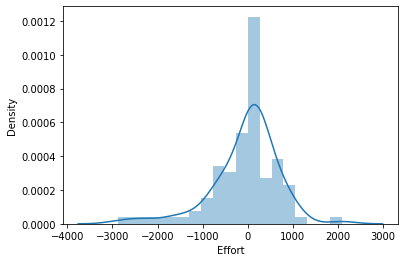

In [36]:
sns.distplot(y_pred-y_test)

In [115]:
estimators_sec = [
    ('rfr', make_pipeline(RandomForestRegressor(n_estimators=100))),
    ('lr', make_pipeline(LinearRegression())),
    ('xgb', make_pipeline(XGBRegressor()))
]

In [116]:
sec_clf = StackingRegressor(estimators=estimators_sec, final_estimator=LinearRegression())
sec_scores=[]
for i in range(0, 42):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    sec_clf.fit(x_train, y_train)
    #print(clf.score(x_train, y_train))
    sec_scores.append(["For value of ",i, " got accuracy ", sec_clf.score(x_test, y_test)])
    print(sec_clf.score(x_test, y_test))

0.665315035592935
0.5383687542028537
0.658654126960025
0.540118703596639
0.5586016098947229
0.5923908775971917
0.7283713274216981
0.6470665187298388
0.5881931193382014
0.6670301911944357
0.7067098848427131
0.6728137349825858
0.6411887418126734
0.628138736206333
0.6066169261330806
0.5982253430495947
0.7088524841749874
0.568125705355661
0.7069550960859022
0.6980816437234821
0.6365825607776092
0.5249897759898197
0.5489969393668757
0.6626668780063252
0.6123395653464846
0.6136550629268833
0.675844624298608
0.6814399019067735
0.7139739239385534
0.6554165645092881
0.5631736994141447
0.688563186971649
0.7430718946704973
0.6630088472831824
0.6054715653964826
0.7883767883853161
0.6391466743907084
0.6161922583328343
0.5542555494950496
0.534118247127187
0.5855829509582331
0.6618065882541179


In [117]:
sec_scores

[['For value of ', 0, ' got accuracy ', 0.665315035592935],
 ['For value of ', 1, ' got accuracy ', 0.5383687542028537],
 ['For value of ', 2, ' got accuracy ', 0.658654126960025],
 ['For value of ', 3, ' got accuracy ', 0.540118703596639],
 ['For value of ', 4, ' got accuracy ', 0.5586016098947229],
 ['For value of ', 5, ' got accuracy ', 0.5923908775971917],
 ['For value of ', 6, ' got accuracy ', 0.7283713274216981],
 ['For value of ', 7, ' got accuracy ', 0.6470665187298388],
 ['For value of ', 8, ' got accuracy ', 0.5881931193382014],
 ['For value of ', 9, ' got accuracy ', 0.6670301911944357],
 ['For value of ', 10, ' got accuracy ', 0.7067098848427131],
 ['For value of ', 11, ' got accuracy ', 0.6728137349825858],
 ['For value of ', 12, ' got accuracy ', 0.6411887418126734],
 ['For value of ', 13, ' got accuracy ', 0.628138736206333],
 ['For value of ', 14, ' got accuracy ', 0.6066169261330806],
 ['For value of ', 15, ' got accuracy ', 0.5982253430495947],
 ['For value of ', 16,

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=35)
sec_clf.fit(x_train, y_train)
sec_clf.score(x_test, y_test)

0.7898231679804628

In [124]:
y_pred = sec_clf.predict(x_test)

In [125]:
error_df["Stacking 2"] = [mean_absolute_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),mean_squared_log_error(y_test, y_pred), r2_score(y_test, y_pred)]

In [126]:
error_df

,Error_Type,Stacking 1,Stacking 2
0,Mean Absolute Error,510.951545,514.635080
1,Root Mean Square Error,744.935131,733.722158
2,Mean Square Log Error,1.022425,1.054807
3,R2_score,0.783350,0.789823
